In [1]:
import sys
import os

# Add the project directory to sys.path
project_path = "/Users/hugocontrerasp/Documents/GitHub/moria_ai_labs_dev/data_readiness/"
if project_path not in sys.path:
    sys.path.append(project_path)

In [3]:
# Import the function
from moria_engine.analysis.data_transformers import build_common_fields_matrix_kpis, build_common_fields_matrix_kpis_G, build_common_fields_matrix_schema
from moria_engine.analysis import graph_visualizer,graph_explainer
from moria_engine.data import loaders
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pyvis.network import Network
import networkx as nx

df_kpis = loaders.load_json_kpis('../data/test/c003_lambengolmor/20250601-hacp-c003_lambengolmor-kpi_details.json')
df_schema = loaders.load_json_schema('../data/test/c003_lambengolmor/20250601-hacp-c003_lambengolmor-data_domains_schema.json')

In [4]:
df_kpis.head()

,kpi_name,domain_name,table_name,field_name
0,Student Enrollment Count,Student Information System (SIS),Students,StudentID
1,Student Retention Rate,Student Information System (SIS),Students,StudentID
2,Student Retention Rate,Student Information System (SIS),Enrollment,StudentID
3,Student Retention Rate,Student Information System (SIS),Semesters,SemesterID
4,Graduation Rate,Student Information System (SIS),Students,StudentID


In [5]:
df_schema.head()

,domain_name,table_name,field_name
0,Student Information System (SIS),Students,StudentID
1,Student Information System (SIS),Students,FirstName
2,Student Information System (SIS),Students,LastName
3,Student Information System (SIS),Students,MiddleName
4,Student Information System (SIS),Students,DateOfBirth


In [6]:
M, table_list, d_table_domain, G = build_common_fields_matrix_kpis(df_kpis)

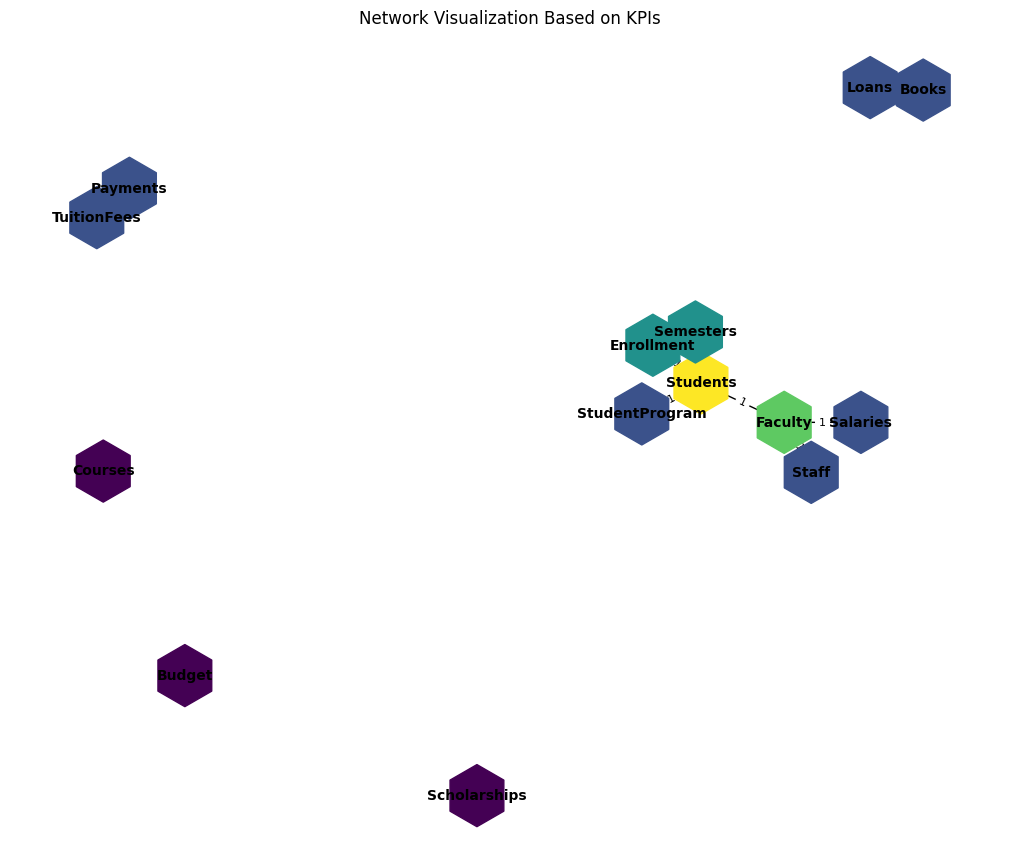

In [7]:
graph_visualizer.visualize_network_kpis(df_kpis)

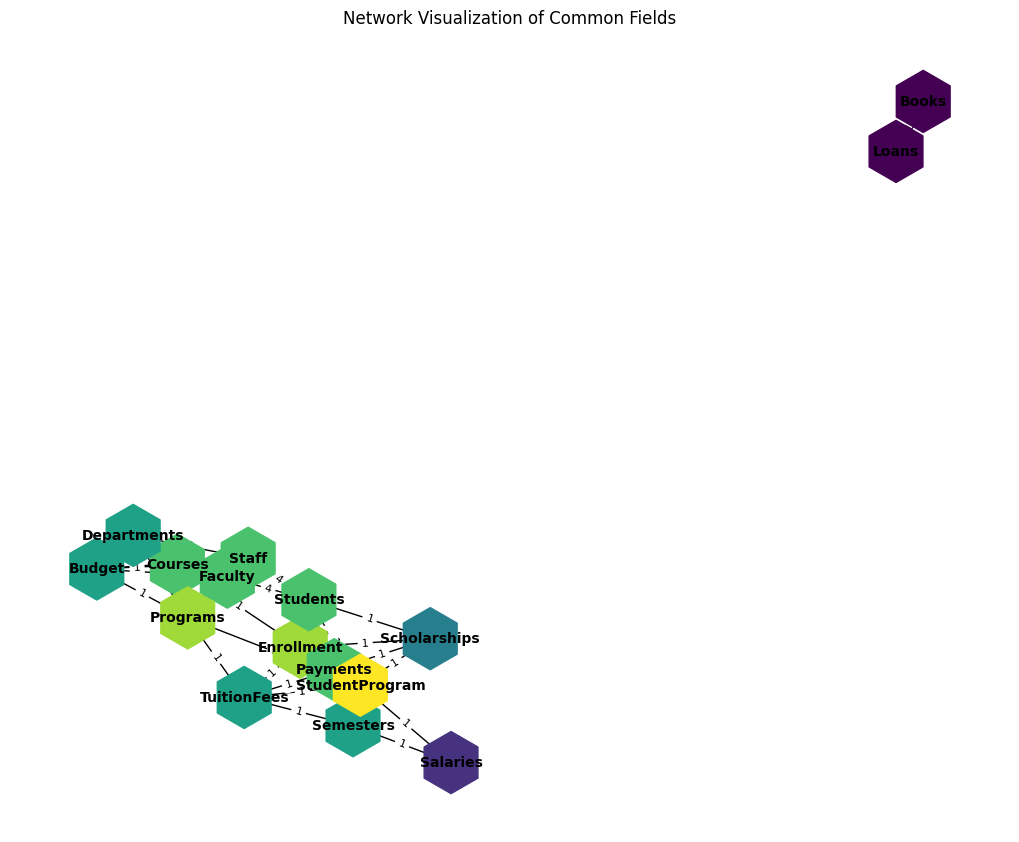

In [8]:
graph_visualizer.visualize_network_schema(df_schema)

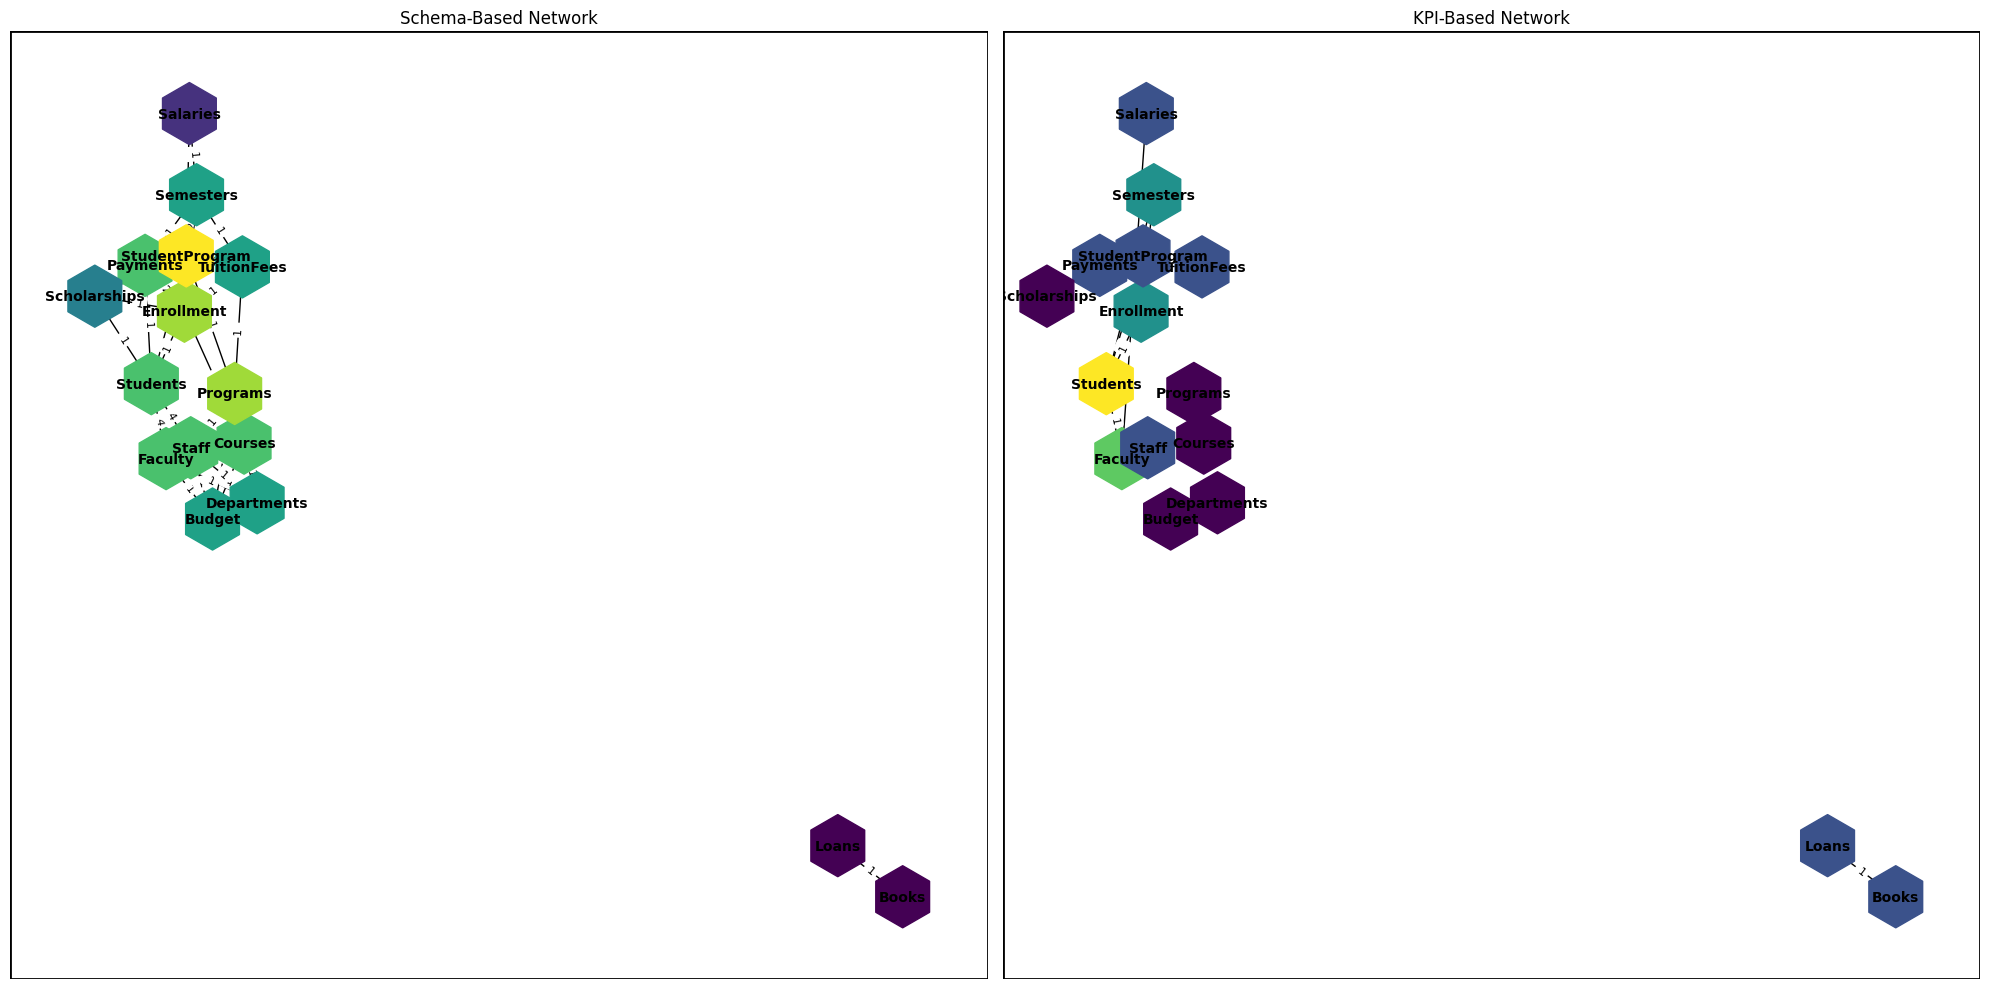

In [9]:
graph_visualizer.visualize_combined_networks1(df_schema, df_kpis)

In [10]:
graph_explainer.graph_centrality_attributes(df_kpis)

,node,domain_name,degree,centrality,betweenness_centrality
0,Books,Library,1,0.076923,0.000000
1,Budget,Finance,0,0.000000,0.000000
2,Courses,Student Information System (SIS),1,0.076923,0.000000
3,Enrollment,Student Information System (SIS),2,0.153846,0.000000
4,Faculty,Human Resources,2,0.153846,0.012821
5,Loans,Library,1,0.076923,0.000000
6,Payments,Finance,0,0.000000,0.000000
7,Salaries,Human Resources,0,0.000000,0.000000
8,Scholarships,Finance,0,0.000000,0.000000
9,Semesters,Student Information System (SIS),0,0.000000,0.000000


In [11]:
graph_explainer.graph_centrality_attributes(df_schema)

,node,domain_name,degree,centrality,betweenness_centrality
0,Books,Library,1,0.066667,0.000000
1,Budget,Finance,5,0.333333,0.000000
2,Courses,Student Information System (SIS),6,0.400000,0.049841
3,Departments,Student Information System (SIS),5,0.333333,0.000000
4,Enrollment,Student Information System (SIS),7,0.466667,0.081587
5,Faculty,Human Resources,6,0.400000,0.024444
6,Loans,Library,1,0.066667,0.000000
7,Payments,Finance,6,0.400000,0.015873
8,Programs,Student Information System (SIS),7,0.466667,0.139365
9,Salaries,Human Resources,2,0.133333,0.000000


In [12]:
df_schema['table_name'].unique()

array(['Students', 'Enrollment', 'Programs', 'StudentProgram', 'Courses',
       'Semesters', 'Departments', 'TuitionFees', 'Scholarships',
       'Payments', 'Budget', 'Faculty', 'Staff', 'Salaries', 'Books',
       'Loans'], dtype=object)

In [13]:
df_kpis['table_name'].unique()

array(['Students', 'Enrollment', 'Semesters', 'StudentProgram', 'Courses',
       'TuitionFees', 'Payments', 'Scholarships', 'Budget', 'Faculty',
       'Staff', 'Salaries', 'Loans', 'Books'], dtype=object)

In [14]:
matrix_kpis, table_names_kpis, table_to_domain_kpis, table_to_kpi, G_kpis = build_common_fields_matrix_kpis_G(df_kpis)
#M_kpis, table_list_kpis, d_table_domain_kpis, G_kpis = build_common_fields_matrix_kpis(df_kpis)

In [15]:
M_schema, table_list_schema, d_table_domain_schema, G_schema = build_common_fields_matrix_schema(df_schema)

In [16]:
G_kpis

In [17]:
nx.algorithms.graph_edit_distance(G_schema, G_kpis)

33.0

In [18]:
graph_explainer.graph_edit_distance_between_schema_and_kpis(G_schema, G_kpis)

33.0

In [19]:
graph_explainer.graph_edit_distance_between_schema_and_kpis(G_kpis, G_schema)

43.0

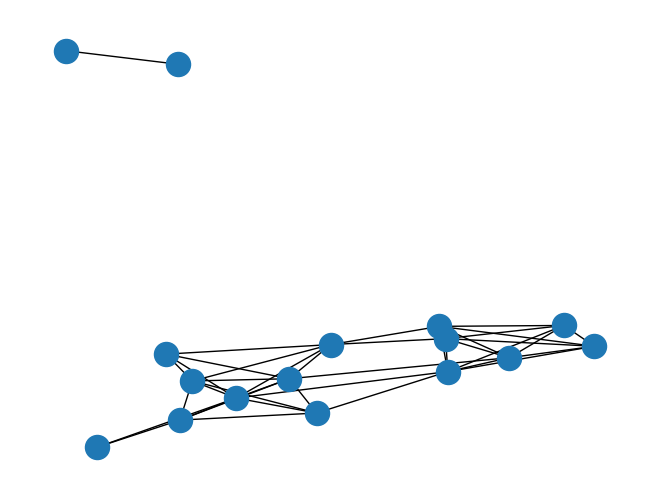